# WeatherPy


3 Observable Trends:
1. The Northern Hemisphere appears to have colder temperatures thand the Southern.  Even with a light data set for the Southern, at -60 and 60 there is a visual difference.
2. Humidity seemed shockingly evenly dispersed across the north and south hemispheres
3. There is much stronger correlation in the Northern Hemisphere than Southern when comparing Max Temp and Latitude.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
import json
from api_keys import weather_api_key
from citipy import citipy
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Use if not testing API and already have data
#file_input = "./city_data.csv"
#backup_city_data = pd.read_csv(file_input).iloc[: , 1:]
#data = backup_city_data

## Generate Cities List

In [3]:
lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
data=pd.DataFrame(cities)
data.columns=['City']
data.head(5)

,City
0,kosovo polje
1,hilo
2,bengkulu
3,chapais
4,hamilton


In [5]:
data["Lat"] = ""
data["Lng"] = ""
data["Max Temp"] = ""
data["Humidity"] = ""
data["Cloudiness"] = ""
data["Wind Speed"] = ""
data["Country"] = ""
data["Date"] = ""
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosovo polje,,,,,,,,
1,hilo,,,,,,,,
2,bengkulu,,,,,,,,
3,chapais,,,,,,,,
4,hamilton,,,,,,,,


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [7]:
for index, row in data.iterrows():
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city=row["City"]
    response = requests.get(query_url + city).json()
    try:           
        data.loc[index, "Lat"] = response["coord"]["lat"]
        data.loc[index, "Lng"] = response["coord"]["lon"]
        data.loc[index, "Max Temp"]= response["main"]["temp_max"]
        data.loc[index, "Humidity"] = response["main"]["humidity"]
        data.loc[index, "Cloudiness"] = response["clouds"]["all"]
        data.loc[index, "Wind Speed"] = response["wind"]["speed"]
        data.loc[index, "Country"] = response["sys"]["country"]
        data.loc[index, "Date"] = response["dt"]
        print(f'Processing Record {index} of Set 1 | {city}')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
data.head()

Processing Record 0 of Set 1 | kosovo polje
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | hamilton
Missing field/result... skipping.
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | nome
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | fairbanks
Processing Record 14 of Set 1 | isla vista
Processing Record 15 of Set 1 | dillon
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | jabinyanah
Processing Record 19 of Set 1 | sabha
Missing field/result... skipping.
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of Set 1 | pecos
Processing Record 24 of Set 1 | east london

Processing Record 201 of Set 1 | hobyo
Processing Record 202 of Set 1 | corpus christi
Processing Record 203 of Set 1 | svetlogorsk
Processing Record 204 of Set 1 | komsomolskiy
Processing Record 205 of Set 1 | oktyabrskoye
Processing Record 206 of Set 1 | garowe
Processing Record 207 of Set 1 | longyearbyen
Processing Record 208 of Set 1 | livingston
Processing Record 209 of Set 1 | sioux lookout
Processing Record 210 of Set 1 | maceio
Processing Record 211 of Set 1 | fortuna
Processing Record 212 of Set 1 | hervey bay
Processing Record 213 of Set 1 | grand gaube
Processing Record 214 of Set 1 | yerbogachen
Processing Record 215 of Set 1 | hay river
Processing Record 216 of Set 1 | duzce
Processing Record 217 of Set 1 | kruisfontein
Processing Record 218 of Set 1 | arraial do cabo
Processing Record 219 of Set 1 | adrar
Processing Record 220 of Set 1 | bandarbeyla
Processing Record 221 of Set 1 | kieta
Processing Record 222 of Set 1 | gornopravdinsk
Missing field/result... skipping.
Pr

Processing Record 396 of Set 1 | jerantut
Processing Record 397 of Set 1 | dergachi
Processing Record 398 of Set 1 | eirunepe
Processing Record 399 of Set 1 | roebourne
Processing Record 400 of Set 1 | meulaboh
Processing Record 401 of Set 1 | nuristan
Processing Record 402 of Set 1 | richards bay
Processing Record 403 of Set 1 | erenhot
Missing field/result... skipping.
Processing Record 405 of Set 1 | tocopilla
Processing Record 406 of Set 1 | luena
Processing Record 407 of Set 1 | tetouan
Processing Record 408 of Set 1 | pisco
Processing Record 409 of Set 1 | vanimo
Processing Record 410 of Set 1 | jizan
Missing field/result... skipping.
Processing Record 412 of Set 1 | xichang
Processing Record 413 of Set 1 | murgab
Processing Record 414 of Set 1 | sioux city
Processing Record 415 of Set 1 | presidencia roque saenz pena
Processing Record 416 of Set 1 | nizhniye sergi
Processing Record 417 of Set 1 | kovacica
Processing Record 418 of Set 1 | leiyang
Processing Record 419 of Set 1 | 

Processing Record 595 of Set 1 | lata
Processing Record 596 of Set 1 | bourail
Processing Record 597 of Set 1 | puerto escondido
Processing Record 598 of Set 1 | trairi
Processing Record 599 of Set 1 | andros
Processing Record 600 of Set 1 | atbasar
Processing Record 601 of Set 1 | khorramabad
Processing Record 602 of Set 1 | deputatskiy
Processing Record 603 of Set 1 | farafangana
Processing Record 604 of Set 1 | togur
Processing Record 605 of Set 1 | muroto
Processing Record 606 of Set 1 | coihueco
Processing Record 607 of Set 1 | avera
Processing Record 608 of Set 1 | beauvais
Processing Record 609 of Set 1 | pokhara
Processing Record 610 of Set 1 | tongchuan
Processing Record 611 of Set 1 | sebastian
Processing Record 612 of Set 1 | saint john
Processing Record 613 of Set 1 | nalut
Processing Record 614 of Set 1 | montes altos
Processing Record 615 of Set 1 | roma
Processing Record 616 of Set 1 | honiara
Missing field/result... skipping.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosovo polje,42.6394,21.0961,57.83,67,40,5.99,XK,1622007259
1,hilo,19.7297,-155.09,80.28,85,75,4.61,US,1622007215
2,bengkulu,-3.8004,102.266,86.07,69,98,9.31,ID,1622007259
3,chapais,49.7834,-74.8492,62.38,97,67,9.89,CA,1622007260
4,hamilton,39.1834,-84.5333,73.15,79,1,4.94,US,1622007242


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
data.to_csv("city_data.csv")
data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosovo polje,42.6394,21.0961,57.83,67,40,5.99,XK,1622007259
1,hilo,19.7297,-155.09,80.28,85,75,4.61,US,1622007215
2,bengkulu,-3.8004,102.266,86.07,69,98,9.31,ID,1622007259
3,chapais,49.7834,-74.8492,62.38,97,67,9.89,CA,1622007260
4,hamilton,39.1834,-84.5333,73.15,79,1,4.94,US,1622007242
...,...,...,...,...,...,...,...,...,...
613,nalut,30.3333,10.85,73.6,47,1,15.88,LY,1622007362
614,montes altos,-5.8333,-47.0667,72.09,81,9,1.43,BR,1622007460
615,roma,43.2128,-75.4557,73.26,78,1,0,US,1622007171
616,honiara,-9.4333,159.95,81.19,79,100,2.62,SB,1622007461


In [9]:
data['Lat'] = pd.to_numeric(data['Lat'], errors='coerce')
data['Lng'] = pd.to_numeric(data['Lng'], errors='coerce')
data['Max Temp'] = pd.to_numeric(data['Max Temp'], errors='coerce')
data['Humidity'] = pd.to_numeric(data['Humidity'], errors='coerce')
data['Cloudiness'] = pd.to_numeric(data['Cloudiness'], errors='coerce')
data['Wind Speed'] = pd.to_numeric(data['Wind Speed'], errors='coerce')
data['Date'] = pd.to_numeric(data['Date'], errors='coerce')
data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.057801,19.305360,65.770052,65.666087,54.260870,8.230574,1.622007e+09
std,33.271324,88.867536,16.756458,23.220121,37.825863,5.619158,8.417196e+01
min,-54.800000,-175.200000,23.230000,7.000000,0.000000,0.000000,1.622007e+09
25%,-8.401150,-58.487000,53.575000,53.000000,17.000000,4.080000,1.622007e+09
50%,25.383300,23.029700,66.160000,69.000000,60.000000,7.140000,1.622007e+09
75%,46.449900,98.020100,79.385000,84.000000,91.000000,10.985000,1.622007e+09
max,78.218600,179.316700,106.860000,100.000000,100.000000,38.900000,1.622007e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
high_humidity = data[(data['Humidity'] > 100)]["City"].count()
high_humidity

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

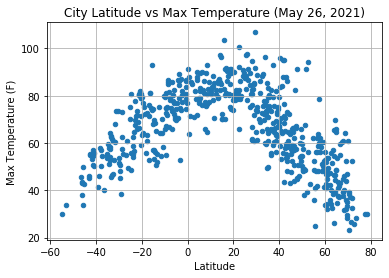

In [11]:
latitude_temperature = current_date = date.today()
date_text = current_date.strftime("%B %d, %Y")
data.plot.scatter(x='Lat', y='Max Temp')
plt.title(f"City Latitude vs Max Temperature ({date_text})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('latitude_temperature.png')

This code is analyzing the max tempurature of a city relative to it's latitude. The equater is at latitude 0, so it makes sense that higher max temps cluster towards the center.


## Latitude vs. Humidity Plot

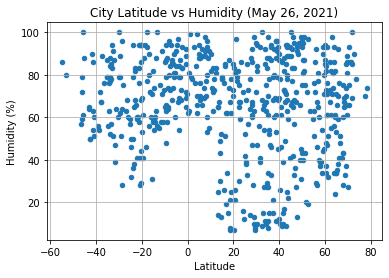

In [12]:
latitude_humidity = data.plot.scatter(x='Lat', y='Humidity')
plt.title(f"City Latitude vs Humidity ({date_text})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('latitude_humidity')

This code is analyzing the humidity level of a city relative to it's latitude. There does not appear to be much relation between the two.

## Latitude vs. Cloudiness Plot

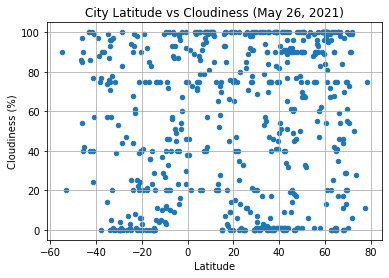

In [13]:
latitude_cloudiness = data.plot.scatter(x='Lat', y='Cloudiness')
plt.title(f"City Latitude vs Cloudiness ({date_text})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('latitude_cloudiness.png')

This code is analyzing the percent cloudiness of a city relative to it's latitude. Much like humidity level, there does not appear to be much relation between the two.

## Latitude vs. Wind Speed Plot

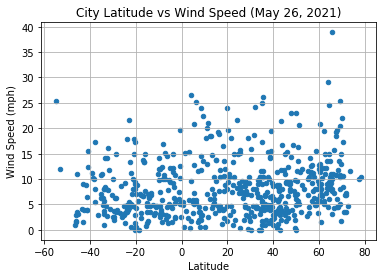

In [14]:
latitude_wind_speed = data.plot.scatter(x='Lat', y='Wind Speed')
plt.title(f"City Latitude vs Wind Speed ({date_text})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('latitude_wind_speed.png')

This code is analyzing the windspeed of a city relative to it's latitude. Much like the last two graphs, there does not appear to be much relation between the two, however there does appear to be more distinct outliers, which implies some sort of relationship.

## Linear Regression

In [15]:
north_data = data[data['Lat'] > 0] 
south_data = data[data['Lat'] < 0]
north_x = north_data['Lat']
south_x = south_data['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

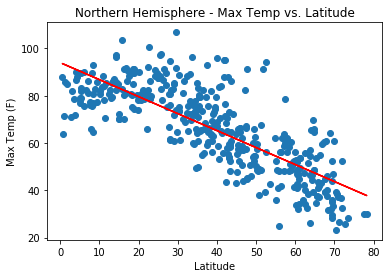

y = -0.72 * x + 94.01


In [16]:
x = north_x
y = north_data['Max Temp']
plt.scatter(x,y)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

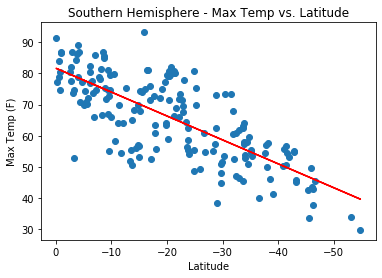

y = 0.77 * x + 81.66


In [17]:
x = south_x
y = south_data['Max Temp']
plt.scatter(x,y)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.gca().invert_xaxis()
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

This code is analyzing the max tempurature of a city relative to it's latitude and creating two graphs. The first graph starts at the equater and works north while the second also starts at the equater but then progresses south. The Northern Hemisphere appears to have a greater corelation while the Southern Hemisphere has more variance between max temp and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

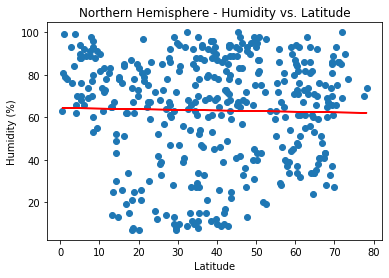

y = -0.03 * x + 64.39


In [18]:
x = north_x
y = north_data['Humidity']
plt.scatter(x,y)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

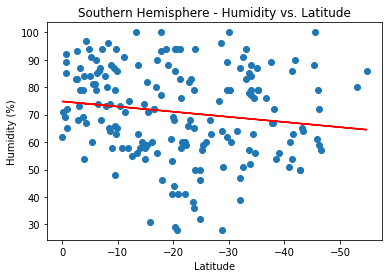

y = 0.19 * x + 74.81


In [19]:
x = south_x
y = south_data['Humidity']
plt.scatter(x,y)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.gca().invert_xaxis()
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

This code is analyzing the humidity level of a city relative to it's latitude and creating two graphs. The first graph starts at the equater and works north while the second also starts at the equater but then progresses south. The Northern Hemisphere appears to have a slight trend towards higher humidity as you get further from the equater. Meanwhile, the Southern Hemisphere appears to have a more pronounced trend towards higher humidity as you get further from the equater. Either way however, the correlation is far too low to say anything conclusively.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

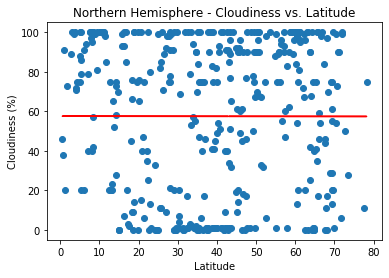

y = -0.0 * x + 57.51


In [20]:
x = north_x
y = north_data['Cloudiness']
plt.scatter(x,y)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

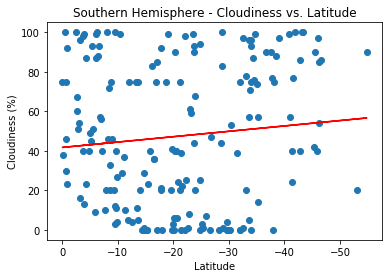

y = -0.27 * x + 41.72


In [21]:
x = south_x
y = south_data['Cloudiness']
plt.scatter(x,y)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.gca().invert_xaxis()
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

This code is analyzing the percent cloudiness of a city relative to it's latitude and creating two graphs. The first graph starts at the equater and works north while the second also starts at the equater but then progresses south. There is minimal, if any, correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

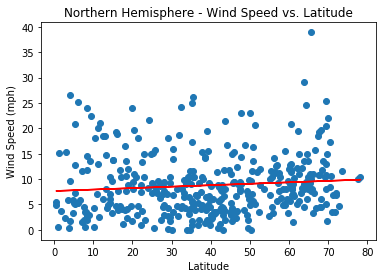

y = 0.03 * x + 7.65


In [22]:
x = north_x
y = north_data['Wind Speed']
plt.scatter(x,y)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

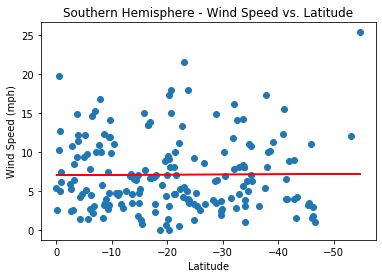

y = -0.0 * x + 7.04


In [23]:
x = south_x
y = south_data['Wind Speed']
plt.scatter(x,y)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.gca().invert_xaxis()
plt.show()
print(f'y = {round(m,2)} * x + {round(b,2)}')

This code is analyzing the wind speed of a city relative to it's latitude and creating two graphs. The first graph starts at the equater and works north while the second also starts at the equater but then progresses south. The Northern Hemisphere appears to have minimal, if any, correlation. Meanwhile, the Southern Hemisphere appears to have some amount of correlation, however the correlation is far too low to say anything conclusively.